In [1]:
#https://github.com/sgauravm/FactorsImpactingGdpPerCapita

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
from math import log10

In [2]:
df = pd.read_csv('./data/clean/all_data.csv', encoding='utf8')
df_meta = pd.read_csv('./data/clean/UNSD - Methodology.csv', encoding='utf8')

df.rename(columns={'Country':'Country or Area'}, inplace=True)

# The second one is the right one (as set by the Statistics UN division)
synonyms = [['Cape Verde', 'Cabo Verde'], 
            ['Czech Republic','Czechia'],
            ["Dem. People's Republic of Korea", "Democratic People's Republic of Korea"],
            ["Micronesia (Fed. States of)", 'Micronesia (Federated States of)'],
            ['Swaziland','Eswatini'],
            ['The former Yugoslav Republic of Macedonia','North Macedonia'],
            ['United States', 'United States of America'],    
            ['Sudan (pre-cession)','Sudan'],
            ['United Kingdom','United Kingdom of Great Britain and Northern Ireland'],
            ["Cote d'Ivoire", 'Côte d’Ivoire'],
            ["Congo, Dem. Rep.", "Congo"],
            ["Congo, Rep.", "Congo"],
            ["Bahamas, The", "Bahamas"],            
            ["Curacao", "Curaçao"],            
            ["Bolivia", 'Bolivia (Plurinational State of)'],
           ]
# Standardize names in df 
# use UN statistics data as the 'right' data
for a in synonyms:
   df.loc[(df['Country or Area'] == a[0]),  ['Country or Area']] = a[1]
# delete areas 
countries = list(df_meta['Country or Area'].values)
df = df[df['Country or Area'].isin(countries)]
df = df[df['Country or Area'] != 'Antarctica']

In [3]:
merged_df = pd.merge(df, df_meta, on=["Country or Area"], how = 'outer')
merged_df = merged_df[merged_df['Country or Area'] != 'Antarctica']
# merged_df has all metadata
merged_df['GDPlog'] = np.log10(merged_df['gdpPerCap'])

In [4]:
merged_df[merged_df['Region Name'].isna()]

,Country or Area,Code,Year,gdpPerCap,literacy,popDensity,under_slum,below_poverty,Import,Export,...,Intermediate Region Name,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries,Unnamed: 16,GDPlog


In [5]:
colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Africa': 'black', 
           'Oceania': 'grey'}

colorsB = ['red','green', 'blue', 'yellow', 'black']
Regions = []
for key, value in colors.items():
    Regions.append(key)

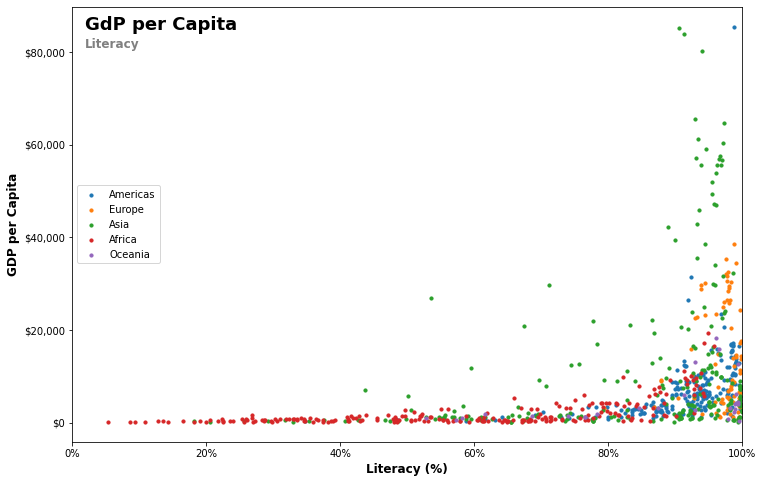

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("Literacy (%)",fontsize=12, fontweight='bold')
ax.set_ylabel("GDP per Capita",color="black",fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0%}'.format(x/100)))
ax.set_xlim([0,100])

for i in range(0,len(Regions)):
    df_tmp= merged_df[merged_df['Region Name'] == Regions[i]]
    ax.scatter(df_tmp['literacy'],df_tmp['gdpPerCap'], s=10, cmap=colorsB[i], label=Regions[i])

ax.legend(loc='center left')

plt.figtext(0.14, 0.84, "GdP per Capita", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Literacy", fontsize=12, color='grey',fontweight='bold')

fmt = lambda x, pos: '${:,.0f}'.format((x), pos)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

custom_ticks = [0,1,2,3,4,5]

#ax.set_yticks(custom_ticks,minor=True)
#plt.savefig('Population_'+country_name+'.jpg')
plt.show()

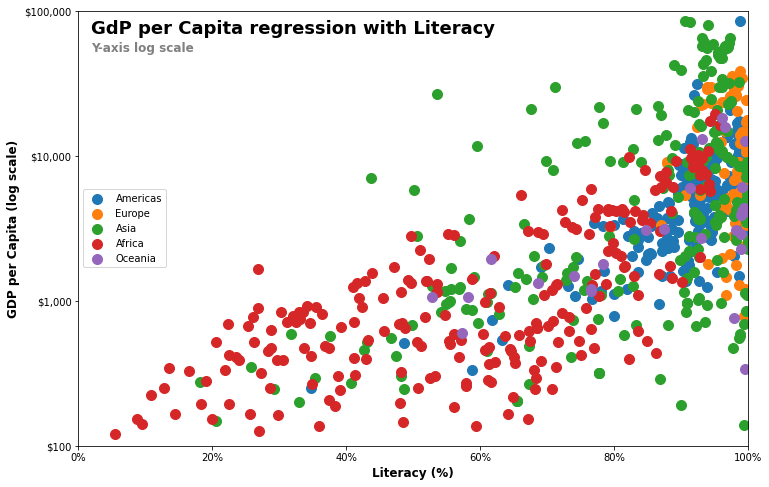

In [31]:
#merged_df = merged_df[merged_df['Region Name'] == 'Americas']

from math import log10
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("Literacy (%)",fontsize=12, fontweight='bold')
ax.set_ylabel("GDP per Capita (log scale)",color="black",fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0%}'.format(x/100)))
ax.set_xlim([0,100])

fmt = lambda x, pos: '${:,.0f}'.format((10 ** x), pos)

ymin, ymax = ax.get_ylim()

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

custom_ticks = np.linspace(ymin,ymax, 4)

custom_ticks = [0,1,2,3,4,5]

ax.set_yticks(custom_ticks,minor=True)


for i in range(0,len(Regions)):
    df_tmp= merged_df[merged_df['Region Name'] == Regions[i]]
    ax.scatter(df_tmp['literacy'],df_tmp['GDPlog'], s=30, cmap=colorsB[i], label=Regions[i])
   
ax.legend(loc='center left')

plt.figtext(0.14, 0.84, "GdP per Capita regression with Literacy", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Y-axis log scale", fontsize=12, color='grey',fontweight='bold')

ax.set_yticks(custom_ticks,major=True)
ax.set_ylim([log10(100),log10(100000)])
#plt.savefig('Population_'+country_name+'.jpg')
plt.show()

In [8]:
def dibu(i,j,continent, y_legend, label_legend):
   tmp = merged_df[merged_df['Region Name'] == continent]
   axs[i,j].set_xlabel("Literacy (%)",fontsize=12, fontweight='bold')
   if y_legend : 
      axs[i,j].set_ylabel("GDP per Capita (log scale)",color="black",fontsize=12, fontweight='bold')
   axs[i,j].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0%}'.format(x/100)))
   axs[i,j].set_xlim([0,100])

   fmt = lambda x, pos: '${:,.0f}'.format((10 ** x), pos)

   ymin, ymax = ax.get_ylim()

   axs[i,j].yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

   custom_ticks = np.linspace(ymin,ymax, 4)
   custom_ticks = [0,1,2,3,4,5]
   axs[i,j].set_yticks(custom_ticks,minor=True)

   for k in range(0,len(Regions)):
      df_tmp= tmp[tmp['Region Name'] == Regions[k]]
      axs[i,j].scatter(df_tmp['literacy'],df_tmp['GDPlog'], s=30, cmap=colorsB[k], label=Regions[k])
   
   if label_legend:
      axs[i,j].legend(loc='center left')

   axs[i,j].set_yticks(custom_ticks,major=True)
   axs[i,j].set_ylim([log10(100),log10(100000)])
   axs[i,j].set_title(continent, fontsize=18, fontweight='bold')

   plt.figtext(0, 1, "GdP per Capita regression with Literacy", fontsize=18, fontweight='bold')
   plt.figtext(0, 0.98, "Y-axis log scale", fontsize=12, color='grey',fontweight='bold')
   fig.tight_layout() 

#plt.savefig('Population_'+country_name+'.jpg')

   return

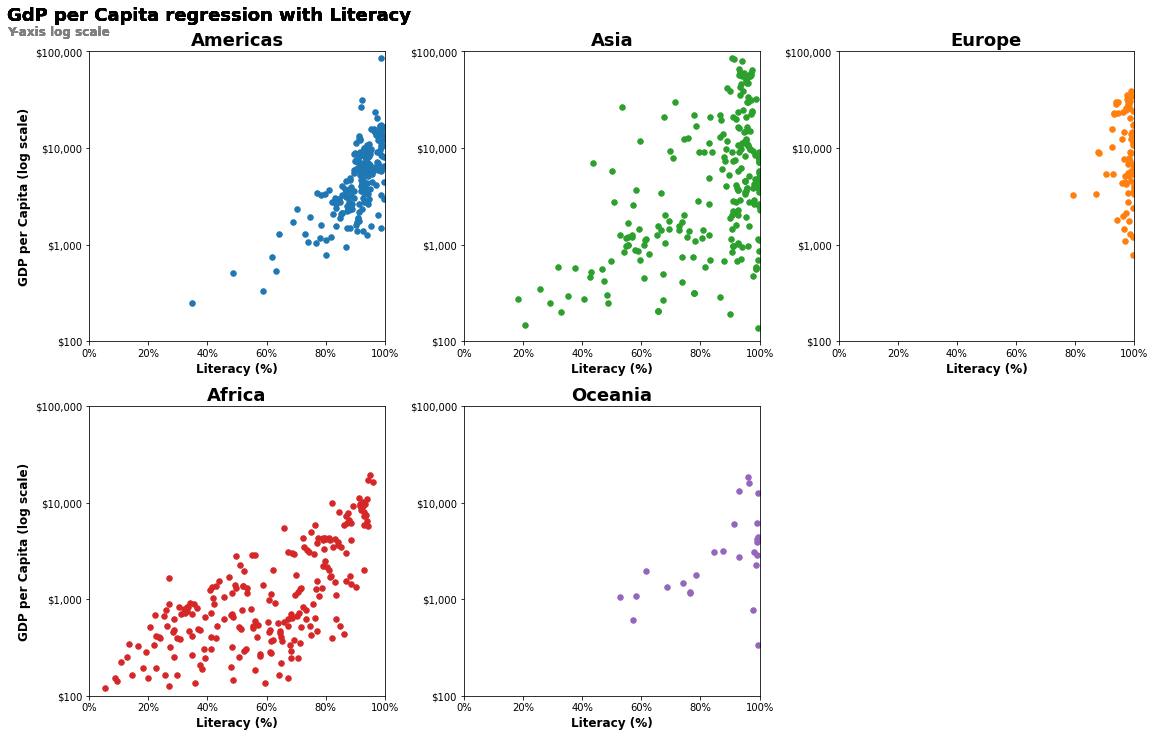

In [9]:
# Comparison Regions
fig, axs = plt.subplots(2,3,figsize=(16,10))

dibu(0,0,'Americas', True, False)
dibu(0,1,'Asia', False, False)
dibu(0,2,'Europe', False, False)
dibu(1,0,'Africa', True, False)
dibu(1,1,'Oceania', False, False)
fig.delaxes(axs[1,2])
plt.show()

In [10]:
# regression line
df['GDPlog'] = np.log10(df['gdpPerCap'])
df1 = df.dropna()

x = df1['literacy'].values
y = df1['GDPlog'].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
model = LinearRegression().fit(x,y)

x_line = np.linspace(0, 100, 100)
#x_line = np.log10(x_line)
x_line = x_line.reshape(len(x_line), 1)

line_y = model.predict(x_line)

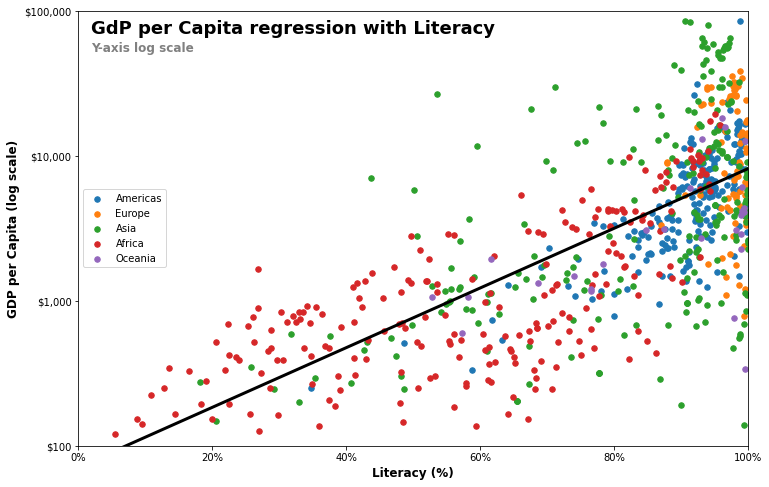

In [11]:
#merged_df = merged_df[merged_df['Region Name'] == 'Americas']

fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("Literacy (%)",fontsize=12, fontweight='bold')
ax.set_ylabel("GDP per Capita (log scale)",color="black",fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0%}'.format(x/100)))
ax.set_xlim([0,100])

fmt = lambda x, pos: '${:,.0f}'.format((10 ** x), pos)

ymin, ymax = ax.get_ylim()

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

custom_ticks = np.linspace(ymin,ymax, 4)

custom_ticks = [0,1,2,3,4,5]

ax.set_yticks(custom_ticks,minor=True)


for i in range(0,len(Regions)):
    df_tmp= merged_df[merged_df['Region Name'] == Regions[i]]
    ax.scatter(df_tmp['literacy'],df_tmp['GDPlog'], s=30, cmap=colorsB[i], label=Regions[i])
ax.plot(x_line, line_y, color="black", linewidth=3)  
ax.legend(loc='center left')

plt.figtext(0.14, 0.84, "GdP per Capita regression with Literacy", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Y-axis log scale", fontsize=12, color='grey',fontweight='bold')

ax.set_yticks(custom_ticks,major=True)
ax.set_ylim([log10(100),log10(100000)])
#plt.savefig('Population_'+country_name+'.jpg')
plt.show()

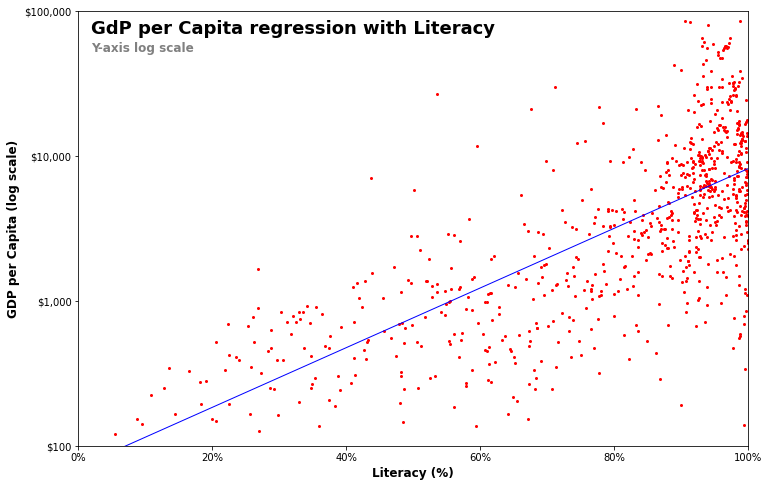

In [12]:
# with regression line
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("Literacy (%)",fontsize=12, fontweight='bold')
ax.set_ylabel("GDP per Capita (log scale)",color="black",fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0%}'.format(x/100)))
ax.set_xlim([0,100])

fmt = lambda x, pos: '${:,.0f}'.format((10 ** x), pos)

ymin, ymax = ax.get_ylim()

ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

custom_ticks = np.linspace(ymin,ymax, 4)

custom_ticks = [0,1,2,3,4,5]

ax.set_yticks(custom_ticks,minor=True)

ax.plot(x_line, line_y, color="blue", linewidth=1)
plt.scatter(df['literacy'],df['GDPlog'], color='red', s=4)
plt.figtext(0.14, 0.84, "GdP per Capita regression with Literacy", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Y-axis log scale", fontsize=12, color='grey',fontweight='bold')

ax.set_yticks(custom_ticks,major=True)
ax.set_ylim([log10(100),log10(100000)])
#plt.savefig('Population_'+country_name+'.jpg')
plt.show()

In [13]:
a = 40
b = 60
c = 85

y = model.predict([[np.log10(a)],[np.log10(b)]])
y = model.predict([[a],[b],[c]])
a_hat = y[0,0]
b_hat = y[1,0]
c_hat = y[2,0]

print('The GDP per Capita of a country with a literacy of ',a,'USD$ is', 10**a_hat)
print('The GDP per Capita of a country with a literacy of ',b,'USD$ is', 10**b_hat)
print('The GDP per Capita of a country with a literacy of ',c,'USD$ is', 10**c_hat)

The GDP per Capita of a country with a literacy of  40 USD$ is 475.4842201639932
The GDP per Capita of a country with a literacy of  60 USD$ is 1226.6898718803295
The GDP per Capita of a country with a literacy of  85 USD$ is 4010.8195041558083


In [16]:
df['GDPlog'] = np.log10(df['gdpPerCap'])
df =df[df['literacy'].notna()]
x = df['literacy'].values
y = df['GDPlog'].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

y_hat = model.predict(x)
print("Mean squared error: %.2f" % mean_squared_error(y_hat, y))
print("Coefficient of determination: %.2f" % r2_score(y_hat, y))
y.shape

Mean squared error: 0.19
Coefficient of determination: 0.04


(788, 1)

In [21]:
df.columns

Index(['Country or Area', 'Code', 'Year', 'gdpPerCap', 'literacy',
       'popDensity', 'under_slum', 'below_poverty', 'Import', 'Export',
       'Corruption', 'GovEff', 'PolSta', 'adult_mortality', 'Male', 'Female',
       'Global Code', 'Global Name', 'Region Code', 'Region Name',
       'Sub-region Code', 'Sub-region Name', 'Intermediate Region Code',
       'Intermediate Region Name', 'M49 Code', 'ISO-alpha2 Code',
       'ISO-alpha3 Code', 'Least Developed Countries (LDC)',
       'Land Locked Developing Countries (LLDC)',
       'Small Island Developing States (SIDS)',
       'Developed / Developing Countries', 'Unnamed: 16', 'GDPlog'],
      dtype='object')

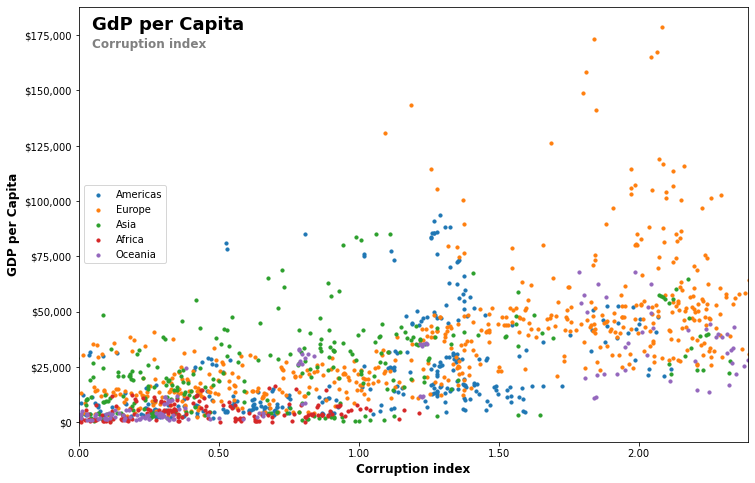

In [27]:
df = df_tmp
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("Corruption index",fontsize=12, fontweight='bold')
ax.set_ylabel("GDP per Capita",color="black",fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
ax.set_xlim([0,df['Corruption'].max()])

for i in range(0,len(Regions)):
    df_tmp= merged_df[merged_df['Region Name'] == Regions[i]]
    ax.scatter(df_tmp['Corruption'],df_tmp['gdpPerCap'], s=10, cmap=colorsB[i], label=Regions[i])

ax.legend(loc='center left')

plt.figtext(0.14, 0.84, "GdP per Capita", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Corruption index", fontsize=12, color='grey',fontweight='bold')

fmt = lambda x, pos: '${:,.0f}'.format((x), pos)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

custom_ticks = [0,1,2,3,4,5]

#ax.set_yticks(custom_ticks,minor=True)
#plt.savefig('Population_'+country_name+'.jpg')
plt.show()

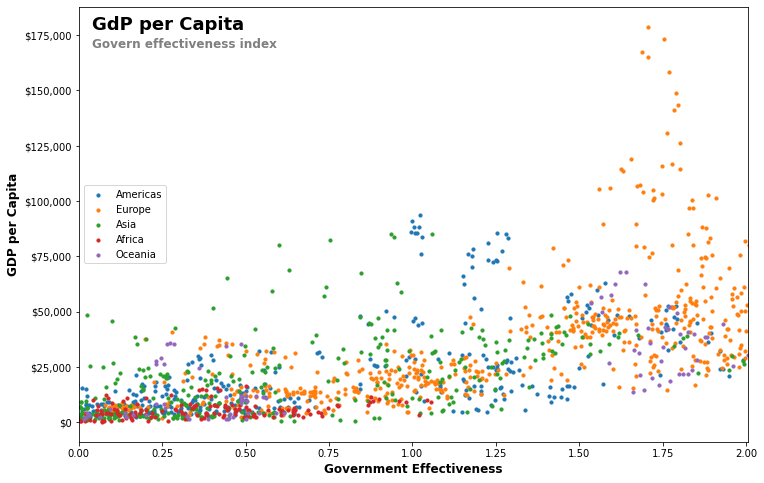

In [29]:
df = df_tmp
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("Government Effectiveness",fontsize=12, fontweight='bold')
ax.set_ylabel("GDP per Capita",color="black",fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
ax.set_xlim([0,df['GovEff'].max()])

for i in range(0,len(Regions)):
    df_tmp= merged_df[merged_df['Region Name'] == Regions[i]]
    ax.scatter(df_tmp['GovEff'],df_tmp['gdpPerCap'], s=10, cmap=colorsB[i], label=Regions[i])

ax.legend(loc='center left')

plt.figtext(0.14, 0.84, "GdP per Capita", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Govern effectiveness index", fontsize=12, color='grey',fontweight='bold')

fmt = lambda x, pos: '${:,.0f}'.format((x), pos)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

custom_ticks = [0,1,2,3,4,5]

#ax.set_yticks(custom_ticks,minor=True)
#plt.savefig('Population_'+country_name+'.jpg')
plt.show()

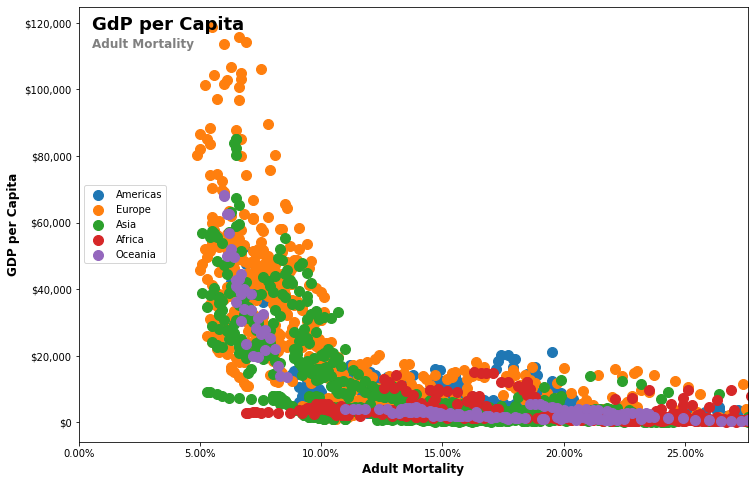

In [41]:
# Ojo con la definicion de adult mortality

f = df_tmp
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.set_xlabel("Adult Mortality",fontsize=12, fontweight='bold')
ax.set_ylabel("GDP per Capita",color="black",fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.2%}'.format(x/1000)))
ax.set_xlim([0,df['adult_mortality'].max()])

for i in range(0,len(Regions)):
    df_tmp= merged_df[merged_df['Region Name'] == Regions[i]]
    ax.scatter(df_tmp['adult_mortality'],df_tmp['gdpPerCap'], s=10, cmap=colorsB[i], label=Regions[i])

ax.legend(loc='center left')

plt.figtext(0.14, 0.84, "GdP per Capita", fontsize=18, fontweight='bold')
plt.figtext(0.14, 0.81, "Adult Mortality", fontsize=12, color='grey',fontweight='bold')

fmt = lambda x, pos: '${:,.0f}'.format((x), pos)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

custom_ticks = [0,1,2,3,4,5]

#ax.set_yticks(custom_ticks,minor=True)
#plt.savefig('Population_'+country_name+'.jpg')
plt.show()

In [ ]:
# https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922


In [40]:
df['adult_mortality'].max()

276.0